<a href="https://colab.research.google.com/github/Lucia1009/TFG-Plataforma-para-la-prediccion-de-potencia-electrica-generada-en-parques-eolicos/blob/desarrollo/modelos/comparar_reales_pagina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, max_error

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
reales=pd.read_csv('/content/produkt_wind_399_akt.txt', delimiter=';')
reales_10_min=pd.read_csv('/content/produkt_zehn_st_min_ff_20150701_20241231_00399.txt', delimiter=';')
temperatura=pd.read_csv('/content/produkt_air_temperature_399_akt.txt', delimiter=';')
temperatura_10_min=pd.read_csv('/content/produkt_zehn_st_min_tu_20150701_20241231_00399.txt', delimiter=';')

display(reales.head())
display(reales_10_min.head())
display(temperatura.head())
display(temperatura_10_min.head())
print('reales', reales.columns)
print('reales_10_min', reales_10_min.columns)
print('temperatura', temperatura.columns)
print('temperatura_10_min', temperatura_10_min.columns)

,STATIONS_ID,MESS_DATUM,QUALITAETS_NIVEAU,STRUKTUR_VERSION,WINDGESCHWINDIGKEIT,WINDRICHTUNG,eor
0,399,2015082001,2,0,7.5,100,eor
1,399,2015082002,2,0,8.1,120,eor
2,399,2015082003,2,0,7.3,120,eor
3,399,2015082004,2,0,7.4,120,eor
4,399,2015082005,2,0,8.6,120,eor


,STATIONS_ID,MESS_DATUM,QN,FF_ST_10,DD_ST_10,eor
0,399,201507010000,3,8.0,70,eor
1,399,201507010010,3,7.9,60,eor
2,399,201507010020,3,7.6,60,eor
3,399,201507010030,3,7.2,60,eor
4,399,201507010040,3,6.8,60,eor


,STATIONS_ID,MESS_DATUM,QUALITAETS_NIVEAU,STRUKTUR_VERSION,LUFTTEMPERATUR,REL_FEUCHTE,STRAHLUNGSTEMPERATUR,eor
0,399,2015082001,3,0,15.9,92,-999,eor ...
1,399,2015082002,3,0,15.2,93,-999,eor ...
2,399,2015082003,3,0,14.8,87,-999,eor ...
3,399,2015082004,3,0,14.6,70,-999,eor ...
4,399,2015082005,3,0,15.0,63,-999,eor ...


,STATIONS_ID,MESS_DATUM,QN,TT_ST_10,RF_ST_10,STRAHL_ST_10,TT5_ST_10,eor
0,399,201507010000,3,17.3,67.9,-999,14.0,eor
1,399,201507010010,3,17.2,67.5,-999,13.9,eor
2,399,201507010020,3,17.1,67.7,-999,13.9,eor
3,399,201507010030,3,17.2,67.7,-999,13.7,eor
4,399,201507010040,3,17.1,68.3,-999,13.9,eor


reales Index(['STATIONS_ID', ' MESS_DATUM', ' QUALITAETS_NIVEAU', ' STRUKTUR_VERSION',
       ' WINDGESCHWINDIGKEIT', ' WINDRICHTUNG', ' eor'],
      dtype='object')
reales_10_min Index(['STATIONS_ID', 'MESS_DATUM', '  QN', 'FF_ST_10', 'DD_ST_10', 'eor'], dtype='object')
temperatura Index(['STATIONS_ID', ' MESS_DATUM', ' QUALITAETS_NIVEAU', ' STRUKTUR_VERSION',
       ' LUFTTEMPERATUR', ' REL_FEUCHTE', ' STRAHLUNGSTEMPERATUR',
       ' eor                                                                                    '],
      dtype='object')
temperatura_10_min Index(['STATIONS_ID', 'MESS_DATUM', '  QN', 'TT_ST_10', 'RF_ST_10',
       'STRAHL_ST_10', 'TT5_ST_10', 'eor'],
      dtype='object')


In [3]:
# Cambiar los nombres de las columnas del alemán al español
reales.rename(columns={
    'STATIONS_ID': 'id_estacion',
    ' MESS_DATUM': 'fecha',
    ' QUALITAETS_NIVEAU': 'nivel_calidad',
    ' STRUKTUR_VERSION': 'version_estructura',
    ' WINDGESCHWINDIGKEIT': 'velocidad de viento',
    ' WINDRICHTUNG':'direccion de viento',
    ' eor':'eor'}, inplace=True)

reales_10_min.rename(columns={
    'STATIONS_ID': 'id_estacion',
    'MESS_DATUM': 'fecha',
    '  QN': 'nivel_calidad',
    'FF_ST_10': 'velocidad de viento',
    'DD_ST_10':'direccion de viento',
    'eor':'eor'}, inplace=True)

temperatura.rename(columns={
    'STATIONS_ID': 'id_estacion',
    ' MESS_DATUM': 'fecha',
    ' LUFTTEMPERATUR': 'temperatura'}, inplace=True)

temperatura_10_min.rename(columns={
    'STATIONS_ID': 'id_estacion',
    'MESS_DATUM': 'fecha',
    'TT_ST_10': 'temperatura'}, inplace=True)

display(reales.head())
display(reales_10_min.head())
display(temperatura.head())
display(temperatura_10_min.head())

,id_estacion,fecha,nivel_calidad,version_estructura,velocidad de viento,direccion de viento,eor
0,399,2015082001,2,0,7.5,100,eor
1,399,2015082002,2,0,8.1,120,eor
2,399,2015082003,2,0,7.3,120,eor
3,399,2015082004,2,0,7.4,120,eor
4,399,2015082005,2,0,8.6,120,eor


,id_estacion,fecha,nivel_calidad,velocidad de viento,direccion de viento,eor
0,399,201507010000,3,8.0,70,eor
1,399,201507010010,3,7.9,60,eor
2,399,201507010020,3,7.6,60,eor
3,399,201507010030,3,7.2,60,eor
4,399,201507010040,3,6.8,60,eor


,id_estacion,fecha,QUALITAETS_NIVEAU,STRUKTUR_VERSION,temperatura,REL_FEUCHTE,STRAHLUNGSTEMPERATUR,eor
0,399,2015082001,3,0,15.9,92,-999,eor ...
1,399,2015082002,3,0,15.2,93,-999,eor ...
2,399,2015082003,3,0,14.8,87,-999,eor ...
3,399,2015082004,3,0,14.6,70,-999,eor ...
4,399,2015082005,3,0,15.0,63,-999,eor ...


,id_estacion,fecha,QN,temperatura,RF_ST_10,STRAHL_ST_10,TT5_ST_10,eor
0,399,201507010000,3,17.3,67.9,-999,14.0,eor
1,399,201507010010,3,17.2,67.5,-999,13.9,eor
2,399,201507010020,3,17.1,67.7,-999,13.9,eor
3,399,201507010030,3,17.2,67.7,-999,13.7,eor
4,399,201507010040,3,17.1,68.3,-999,13.9,eor


In [4]:
# Cambiar el formato de la fecha
reales['fecha'] = pd.to_datetime(reales['fecha'], format='%Y%m%d%H', errors='coerce')
reales_10_min['fecha'] = pd.to_datetime(reales_10_min['fecha'], format='%Y%m%d%H%M', errors='coerce')
temperatura['fecha'] = pd.to_datetime(temperatura['fecha'], format='%Y%m%d%H', errors='coerce')
temperatura_10_min['fecha'] = pd.to_datetime(temperatura_10_min['fecha'], format='%Y%m%d%H%M', errors='coerce')
display(reales.head())
display(reales_10_min.head())
display(temperatura.head())
display(temperatura_10_min.head())

,id_estacion,fecha,nivel_calidad,version_estructura,velocidad de viento,direccion de viento,eor
0,399,2015-08-20 01:00:00,2,0,7.5,100,eor
1,399,2015-08-20 02:00:00,2,0,8.1,120,eor
2,399,2015-08-20 03:00:00,2,0,7.3,120,eor
3,399,2015-08-20 04:00:00,2,0,7.4,120,eor
4,399,2015-08-20 05:00:00,2,0,8.6,120,eor


,id_estacion,fecha,nivel_calidad,velocidad de viento,direccion de viento,eor
0,399,2015-07-01 00:00:00,3,8.0,70,eor
1,399,2015-07-01 00:10:00,3,7.9,60,eor
2,399,2015-07-01 00:20:00,3,7.6,60,eor
3,399,2015-07-01 00:30:00,3,7.2,60,eor
4,399,2015-07-01 00:40:00,3,6.8,60,eor


,id_estacion,fecha,QUALITAETS_NIVEAU,STRUKTUR_VERSION,temperatura,REL_FEUCHTE,STRAHLUNGSTEMPERATUR,eor
0,399,2015-08-20 01:00:00,3,0,15.9,92,-999,eor ...
1,399,2015-08-20 02:00:00,3,0,15.2,93,-999,eor ...
2,399,2015-08-20 03:00:00,3,0,14.8,87,-999,eor ...
3,399,2015-08-20 04:00:00,3,0,14.6,70,-999,eor ...
4,399,2015-08-20 05:00:00,3,0,15.0,63,-999,eor ...


,id_estacion,fecha,QN,temperatura,RF_ST_10,STRAHL_ST_10,TT5_ST_10,eor
0,399,2015-07-01 00:00:00,3,17.3,67.9,-999,14.0,eor
1,399,2015-07-01 00:10:00,3,17.2,67.5,-999,13.9,eor
2,399,2015-07-01 00:20:00,3,17.1,67.7,-999,13.9,eor
3,399,2015-07-01 00:30:00,3,17.2,67.7,-999,13.7,eor
4,399,2015-07-01 00:40:00,3,17.1,68.3,-999,13.9,eor


In [5]:
# Borrar las filas en las que algún campo sea -999 (quito nulos)
print(reales.shape)
print(reales_10_min.shape)
print(temperatura.shape)
print(temperatura_10_min.shape)
reales = reales[reales['velocidad de viento'] != -999]
reales_10_min = reales_10_min[reales_10_min['velocidad de viento'] != -999]
temperatura = temperatura[temperatura['temperatura'] != -999]
temperatura_10_min = temperatura_10_min[temperatura_10_min['temperatura'] != -999]
print()

print(reales.shape)
print(reales_10_min.shape)
print(temperatura.shape)
print(temperatura_10_min.shape)
reales = reales[reales['direccion de viento'] != -999]
reales_10_min = reales_10_min[reales_10_min['direccion de viento'] != -999]
temperatura = temperatura[temperatura['temperatura'] != -999]
temperatura_10_min = temperatura_10_min[temperatura_10_min['temperatura'] != -999]
print()

print(reales.shape)
print(reales_10_min.shape)
print(temperatura.shape)
print(temperatura_10_min.shape)

(70607, 7)
(498855, 6)
(83127, 8)
(499895, 8)

(70607, 7)
(420979, 6)
(83123, 8)
(494955, 8)

(70607, 7)
(420930, 6)
(83123, 8)
(494955, 8)


In [6]:
# Tomo los datos de 2023 y 2024
reales_2023_2024 = reales[(reales['fecha'].dt.year >= 2023)&(reales['fecha'].dt.year <= 2024)]
reales_10_min_2023_2024 = reales_10_min[(reales_10_min['fecha'].dt.year >= 2023)&(reales_10_min['fecha'].dt.year <= 2024)]
temperatura_2023_2024 = temperatura[(temperatura['fecha'].dt.year >= 2023)&(temperatura['fecha'].dt.year <= 2024)]
temperatura_10_min_2023_2024 = temperatura_10_min[(temperatura_10_min['fecha'].dt.year >= 2023)&(temperatura_10_min['fecha'].dt.year <= 2024)]

display(reales_2023_2024.head())
display(reales_2023_2024.tail())
display(reales_10_min_2023_2024.head())
display(reales_10_min_2023_2024.tail())
display(temperatura_2023_2024.head())
display(temperatura_2023_2024.tail())
display(temperatura_10_min_2023_2024.head())
display(temperatura_10_min_2023_2024.tail())

,id_estacion,fecha,nivel_calidad,version_estructura,velocidad de viento,direccion de viento,eor
59578,399,2023-01-01 00:00:00,2,0,19.8,230,eor
59579,399,2023-01-01 01:00:00,2,0,20.0,230,eor
59580,399,2023-01-01 02:00:00,2,0,18.5,230,eor
59581,399,2023-01-01 03:00:00,2,0,18.3,230,eor
59582,399,2023-01-01 04:00:00,2,0,19.2,230,eor


,id_estacion,fecha,nivel_calidad,version_estructura,velocidad de viento,direccion de viento,eor
68900,399,2024-12-31 19:00:00,2,0,16.6,250,eor
68901,399,2024-12-31 20:00:00,2,0,17.7,240,eor
68902,399,2024-12-31 21:00:00,2,0,18.9,230,eor
68903,399,2024-12-31 22:00:00,2,0,19.5,240,eor
68904,399,2024-12-31 23:00:00,2,0,20.8,240,eor


,id_estacion,fecha,nivel_calidad,velocidad de viento,direccion de viento,eor
394704,399,2023-01-01 00:00:00,3,20.2,230,eor
394705,399,2023-01-01 00:10:00,3,20.0,230,eor
394706,399,2023-01-01 00:20:00,3,19.5,230,eor
394707,399,2023-01-01 00:30:00,3,19.5,230,eor
394708,399,2023-01-01 00:40:00,3,20.2,230,eor


,id_estacion,fecha,nivel_calidad,velocidad de viento,direccion de viento,eor
498850,399,2024-12-31 23:10:00,3,22.4,230,eor
498851,399,2024-12-31 23:20:00,3,22.2,230,eor
498852,399,2024-12-31 23:30:00,3,21.8,230,eor
498853,399,2024-12-31 23:40:00,3,22.4,230,eor
498854,399,2024-12-31 23:50:00,3,22.7,230,eor


,id_estacion,fecha,QUALITAETS_NIVEAU,STRUKTUR_VERSION,temperatura,REL_FEUCHTE,STRAHLUNGSTEMPERATUR,eor
64137,399,2023-01-01 00:00:00,3,0,16.0,61,-999,eor ...
64138,399,2023-01-01 01:00:00,3,0,16.0,57,-999,eor ...
64139,399,2023-01-01 02:00:00,3,0,15.6,56,-999,eor ...
64140,399,2023-01-01 03:00:00,3,0,15.6,55,-999,eor ...
64141,399,2023-01-01 04:00:00,3,0,15.6,54,-999,eor ...


,id_estacion,fecha,QUALITAETS_NIVEAU,STRUKTUR_VERSION,temperatura,REL_FEUCHTE,STRAHLUNGSTEMPERATUR,eor
81417,399,2024-12-31 19:00:00,3,0,3.1,81,-999,eor ...
81418,399,2024-12-31 20:00:00,3,0,3.2,80,-999,eor ...
81419,399,2024-12-31 21:00:00,3,0,3.0,79,-999,eor ...
81420,399,2024-12-31 22:00:00,3,0,2.9,79,-999,eor ...
81421,399,2024-12-31 23:00:00,3,0,2.7,79,-999,eor ...


,id_estacion,fecha,QN,temperatura,RF_ST_10,STRAHL_ST_10,TT5_ST_10,eor
394704,399,2023-01-01 00:00:00,3,15.8,60.6,-999,14.2,eor
394705,399,2023-01-01 00:10:00,3,15.8,60.1,-999,14.0,eor
394706,399,2023-01-01 00:20:00,3,16.0,58.6,-999,14.7,eor
394707,399,2023-01-01 00:30:00,3,15.8,59.2,-999,14.3,eor
394708,399,2023-01-01 00:40:00,3,15.9,58.2,-999,14.4,eor


,id_estacion,fecha,QN,temperatura,RF_ST_10,STRAHL_ST_10,TT5_ST_10,eor
499890,399,2024-12-31 23:10:00,3,2.6,78.4,-999,2.3,eor
499891,399,2024-12-31 23:20:00,3,2.6,78.6,-999,2.3,eor
499892,399,2024-12-31 23:30:00,3,2.6,78.1,-999,2.4,eor
499893,399,2024-12-31 23:40:00,3,2.6,78.5,-999,2.4,eor
499894,399,2024-12-31 23:50:00,3,2.6,78.3,-999,2.4,eor


In [7]:
# Merge las temperaturas y los reales
reales_2023_2024 = pd.merge(reales_2023_2024, temperatura_2023_2024[['fecha', 'temperatura']], on='fecha', how='inner')
reales_10_min_2023_2024 = pd.merge(reales_10_min_2023_2024, temperatura_10_min_2023_2024[['fecha', 'temperatura']], on='fecha', how='inner')

display(reales_2023_2024.head())
display(reales_10_min_2023_2024.head())

,id_estacion,fecha,nivel_calidad,version_estructura,velocidad de viento,direccion de viento,eor,temperatura
0,399,2023-01-01 00:00:00,2,0,19.8,230,eor,16.0
1,399,2023-01-01 01:00:00,2,0,20.0,230,eor,16.0
2,399,2023-01-01 02:00:00,2,0,18.5,230,eor,15.6
3,399,2023-01-01 03:00:00,2,0,18.3,230,eor,15.6
4,399,2023-01-01 04:00:00,2,0,19.2,230,eor,15.6


,id_estacion,fecha,nivel_calidad,velocidad de viento,direccion de viento,eor,temperatura
0,399,2023-01-01 00:00:00,3,20.2,230,eor,15.8
1,399,2023-01-01 00:10:00,3,20.0,230,eor,15.8
2,399,2023-01-01 00:20:00,3,19.5,230,eor,16.0
3,399,2023-01-01 00:30:00,3,19.5,230,eor,15.8
4,399,2023-01-01 00:40:00,3,20.2,230,eor,15.9


In [8]:
# Separo la dirección de viento en seno y coseno
reales_2023_2024['sin'] = np.sin(reales_2023_2024['direccion de viento']*np.pi/180)
reales_2023_2024['cos'] = np.cos(reales_2023_2024['direccion de viento']*np.pi/180)

reales_10_min_2023_2024['sin'] = np.sin(reales_10_min_2023_2024['direccion de viento']*np.pi/180)
reales_10_min_2023_2024['cos'] = np.cos(reales_10_min_2023_2024['direccion de viento']*np.pi/180)

display(reales_2023_2024.head())
display(reales_10_min_2023_2024.head())

,id_estacion,fecha,nivel_calidad,version_estructura,velocidad de viento,direccion de viento,eor,temperatura,sin,cos
0,399,2023-01-01 00:00:00,2,0,19.8,230,eor,16.0,-0.766044,-0.642788
1,399,2023-01-01 01:00:00,2,0,20.0,230,eor,16.0,-0.766044,-0.642788
2,399,2023-01-01 02:00:00,2,0,18.5,230,eor,15.6,-0.766044,-0.642788
3,399,2023-01-01 03:00:00,2,0,18.3,230,eor,15.6,-0.766044,-0.642788
4,399,2023-01-01 04:00:00,2,0,19.2,230,eor,15.6,-0.766044,-0.642788


,id_estacion,fecha,nivel_calidad,velocidad de viento,direccion de viento,eor,temperatura,sin,cos
0,399,2023-01-01 00:00:00,3,20.2,230,eor,15.8,-0.766044,-0.642788
1,399,2023-01-01 00:10:00,3,20.0,230,eor,15.8,-0.766044,-0.642788
2,399,2023-01-01 00:20:00,3,19.5,230,eor,16.0,-0.766044,-0.642788
3,399,2023-01-01 00:30:00,3,19.5,230,eor,15.8,-0.766044,-0.642788
4,399,2023-01-01 00:40:00,3,20.2,230,eor,15.9,-0.766044,-0.642788


In [9]:
# Trato los datos de la página
pagina=pd.read_csv('/content/open-meteo-52.55N13.41E38m (2).csv', skiprows=3)
pagina.head()

pagina.rename(columns={
    'time':'fecha',
    'temperature_2m (°C)':'temperatura',
    'wind_speed_10m (km/h)':'velocidad de viento',
    'wind_direction_10m (°)':'direccion de viento'}, inplace=True)

pagina['fecha'] = pd.to_datetime(pagina['fecha'], format='%Y-%m-%dT%H:%M', errors='coerce')

pagina['sin']=np.sin(pagina['direccion de viento']*np.pi/180)
pagina['cos']=np.cos(pagina['direccion de viento']*np.pi/180)


display(pagina.head())

,fecha,temperatura,velocidad de viento,direccion de viento,sin,cos
0,2023-01-01 00:00:00,15.3,30.5,232,-0.788011,-0.615661
1,2023-01-01 01:00:00,15.7,30.7,231,-0.777146,-0.629320
2,2023-01-01 02:00:00,15.8,31.3,232,-0.788011,-0.615661
3,2023-01-01 03:00:00,15.9,28.4,231,-0.777146,-0.629320
4,2023-01-01 04:00:00,15.8,28.3,223,-0.681998,-0.731354


In [10]:
# Obtengo la comparación de los datos de la página

merged_data = pd.merge(reales_2023_2024, pagina, on='fecha', how='inner')

print('r2 temperatura:', r2_score(merged_data['temperatura_x'], merged_data['temperatura_y']))
print('r2 velocidad de viento:', r2_score(merged_data['velocidad de viento_x'], merged_data['velocidad de viento_y']))
print('r2 direccion de viento:', r2_score(merged_data['direccion de viento_x'], merged_data['direccion de viento_y']))
r2_sin = r2_score(merged_data['sin_x'], merged_data['sin_y'])
r2_cos = r2_score(merged_data['cos_x'], merged_data['cos_y'])
print('r2 seno de viento:', r2_sin)
print('r2 coseno de viento:', r2_cos,'\n')

print('rmse temperatura:', np.sqrt(mean_squared_error(merged_data['temperatura_x'], merged_data['temperatura_y'])))
print('rmse velocidad de viento:', np.sqrt(mean_squared_error(merged_data['velocidad de viento_x'], merged_data['velocidad de viento_y'])))
print('rmse direccion de viento:', np.sqrt(mean_squared_error(merged_data['direccion de viento_x'], merged_data['direccion de viento_y'])))
rmse_sin = np.sqrt(mean_squared_error(merged_data['sin_x'], merged_data['sin_y']))
rmse_cos = np.sqrt(mean_squared_error(merged_data['cos_x'], merged_data['cos_y']))
print('rmse seno de viento:', rmse_sin)
print('rmse coseno de viento:', rmse_cos,'\n')

print('mae temperatura:', mean_absolute_error(merged_data['temperatura_x'], merged_data['temperatura_y']))
print('mae velocidad de viento:', mean_absolute_error(merged_data['velocidad de viento_x'], merged_data['velocidad de viento_y']))
print('mae direccion de viento:', mean_absolute_error(merged_data['direccion de viento_x'], merged_data['direccion de viento_y']))
mae_sin=mean_absolute_error(merged_data['sin_x'], merged_data['sin_y'])
mae_cos=mean_absolute_error(merged_data['cos_x'], merged_data['cos_y'])
print('mae seno de viento:', mae_sin)
print('mae coseno de viento:', mae_cos,'\n')

print('max error temperatura:', max_error(merged_data['temperatura_x'], merged_data['temperatura_y']))
print('max error velocidad de viento:', max_error(merged_data['velocidad de viento_x'], merged_data['velocidad de viento_y']))
print('max error direccion de viento:', max_error(merged_data['direccion de viento_x'], merged_data['direccion de viento_y']))
max_error_sin=max_error(merged_data['sin_x'], merged_data['sin_y'])
max_error_cos=max_error(merged_data['cos_x'], merged_data['cos_y'])
print('max error seno de viento:', max_error_sin)
print('max error coseno de viento:', max_error_cos,'\n')

print('minima dirección', min(merged_data['direccion de viento_x']), min(merged_data['direccion de viento_y']))
print('maxima dirección', max(merged_data['direccion de viento_x']), max(merged_data['direccion de viento_y']))

r2 temperatura: 0.9423540765640993
r2 velocidad de viento: -0.4805009175979549
r2 direccion de viento: 0.575941067351499
r2 seno de viento: 0.7574673896282778
r2 coseno de viento: 0.6725185672663513 

rmse temperatura: 1.648147225262176
rmse velocidad de viento: 6.023019915358432
rmse direccion de viento: 51.779382483785426
rmse seno de viento: 0.35307546386510563
rmse coseno de viento: 0.32671951192356186 

mae temperatura: 1.2703378016085793
mae velocidad de viento: 4.734487935656836
mae direccion de viento: 25.208257372654156
mae seno de viento: 0.21235097534267328
mae coseno de viento: 0.21876334335295836 

max error temperatura: 10.600000000000001
max error velocidad de viento: 21.900000000000002
max error direccion de viento: 358
max error seno de viento: 1.9876883405951378
max error coseno de viento: 1.982371803272032 

minima dirección 10 1
maxima dirección 360 360


In [11]:
# Obtengo el error de la dirección a través del error del seno y el coseno
import math

dir_real=merged_data['direccion de viento_x'][0]
dir_pagina=merged_data['direccion de viento_y'][0]
print('dir real', dir_real)
print('dir pagina', dir_pagina)
error_sin=merged_data['sin_x'][0]-merged_data['sin_y'][0]
error_cos=merged_data['cos_x'][0]-merged_data['cos_y'][0]

error_calculado=math.degrees(math.atan2(error_sin, error_cos))
print('error calculado', error_calculado)
print('error real', (dir_real-dir_pagina))


dir real 230
dir pagina 232
error calculado 140.99999999999997
error real -2


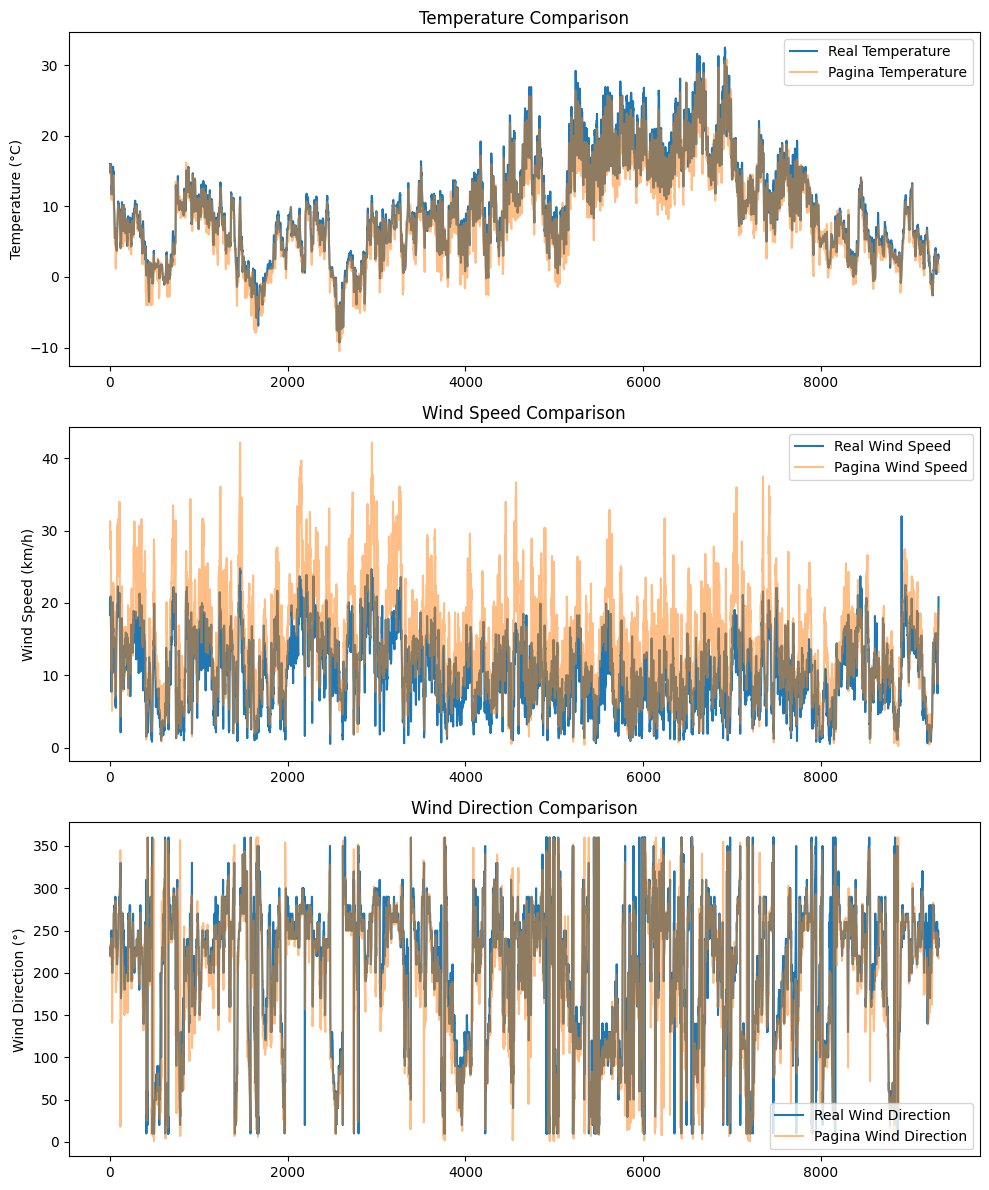

In [12]:
# Create a figure and an array of subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# Plot temperature
axes[0].plot(merged_data['temperatura_x'], label='Real Temperature')
axes[0].plot(merged_data['temperatura_y'], label='Pagina Temperature', alpha=0.5)
axes[0].set_ylabel('Temperature (°C)')
axes[0].set_title('Temperature Comparison')
axes[0].legend()

# Plot wind speed
axes[1].plot(merged_data['velocidad de viento_x'], label='Real Wind Speed')
axes[1].plot(merged_data['velocidad de viento_y'], label='Pagina Wind Speed', alpha=0.5)
axes[1].set_ylabel('Wind Speed (km/h)')
axes[1].set_title('Wind Speed Comparison')
axes[1].legend()

# Plot wind direction
axes[2].plot( merged_data['direccion de viento_x'], label='Real Wind Direction')
axes[2].plot( merged_data['direccion de viento_y'], label='Pagina Wind Direction', alpha=0.5)
axes[2].set_ylabel('Wind Direction (°)')
axes[2].set_title('Wind Direction Comparison')
axes[2].legend()



# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()
